<a href="https://colab.research.google.com/github/ManojaSonti/-React-Routes-and-Axios/blob/main/Traffic_congestion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
 !pip install --upgrade pip

# Deep Learning
!pip install tensorflow torch torchvision torchaudio

# Big Data & Processing
!pip install pyspark dask pandas numpy

# Transformers
!pip install transformers datasets sentencepiece

# Fix sklearn & gymnasium conflicts
!pip uninstall -y scikit-learn
!pip install scikit-learn==1.6.0

!pip uninstall -y gymnasium
!pip install gymnasium==0.29.1

# Stable Baselines3 for DRL
!pip install stable-baselines3[extra]==2.3.2

# Visualization
!pip install matplotlib seaborn

Found existing installation: scikit-learn 1.6.0
Uninstalling scikit-learn-1.6.0:
  Successfully uninstalled scikit-learn-1.6.0
  Using cached scikit_learn-1.6.0-cp312-cp312-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (18 kB)
Using cached scikit_learn-1.6.0-cp312-cp312-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (13.1 MB)
Found existing installation: gymnasium 0.29.1
Uninstalling gymnasium-0.29.1:
  Successfully uninstalled gymnasium-0.29.1
  Using cached gymnasium-0.29.1-py3-none-any.whl.metadata (10 kB)
Using cached gymnasium-0.29.1-py3-none-any.whl (953 kB)
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
dopamine-rl 4.1.2 requires gymnasium>=1.0.0, but you have gymnasium 0.29.1 which is incompatible.
  Using cached stable_baselines3-2.3.2-py3-none-any.whl.metadata (5.1 kB)
  Using cached Shimmy-1.3.0-py3-none-any.whl.metadata (3.7 kB)
  Using c

In [3]:
import pandas as pd

# just read your uploaded CSV directly
df = pd.read_csv("/content/traffic_dataset1 (1).csv")

# Show first 5 rows
print(df.head())

# Show all column names
print(df.columns.tolist())


  Timestamp IR Presence (Lane 1–4)  Vehicle Count  Avg Speed (km/h)  \
0  08:00:00           [0, 0, 1, 0]           97.0              31.2   
1  08:01:00           [0, 0, 1, 1]          126.0              48.5   
2  08:02:00           [1, 0, 0, 0]           61.0              42.0   
3  08:03:00           [0, 0, 0, 0]          170.0              38.0   
4  08:04:00           [1, 0, 0, 0]          180.0              24.7   

                         Vehicle Types Detected  Vehicle Density (%)  \
0  10 Bikes, 90 Ambulance, 60 Fire Extinguisher                 40.0   
1                    32 Ambulance, 94 Ambulance                 57.0   
2    99 Trucks, 76 Patrol, 65 Fire Extinguisher                 82.0   
3      50 Cars, 71 Patrol, 63 Fire Extinguisher                 75.0   
4         17 Patrol, 93 Cars, 25 Bikes, 23 Vans                 90.0   

  Traffic Congestion Level  
0                      Low  
1                   Medium  
2                     High  
3                     Hi

/tmp/ipython-input-4044883432.py:18: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  df['Timestamp'] = pd.to_datetime(df['Timestamp'], errors='coerce', infer_datetime_format=True)
/tmp/ipython-input-4044883432.py:18: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Timestamp'] = pd.to_datetime(df['Timestamp'], errors='coerce', infer_datetime_format=True)


Features: ['VehicleCount', 'AvgSpeed', 'VehicleDensity', 'IR_ActiveLanes', 'IR_L1', 'IR_L2', 'IR_L3', 'IR_L4', 'Count_Bikes', 'Count_Ambul', 'Count_Fire', 'Count_Other', 'Has_Emergency']
Label classes: ['High', 'Low', 'Medium']


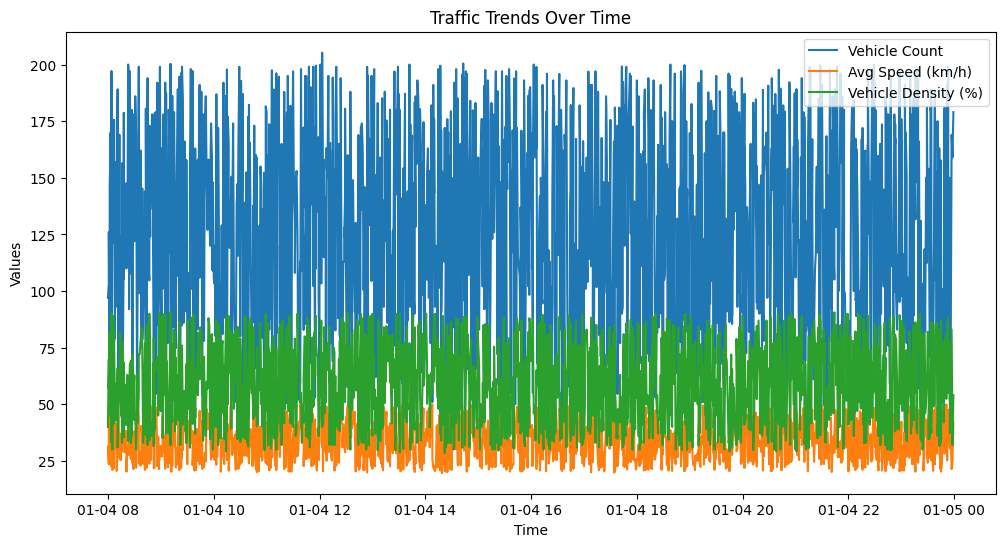

/tmp/ipython-input-4044883432.py:144: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df['CongestionLabel'], palette="viridis")


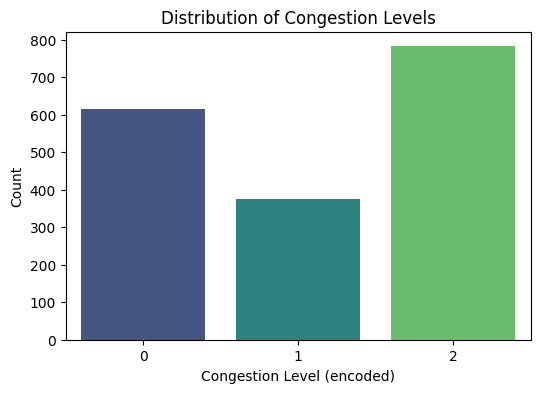

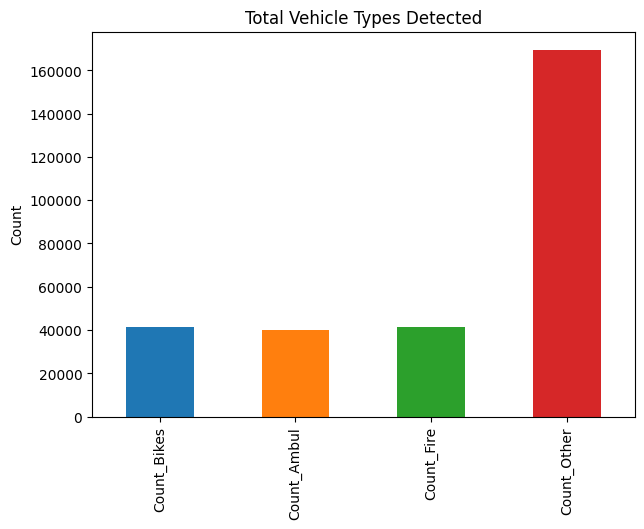

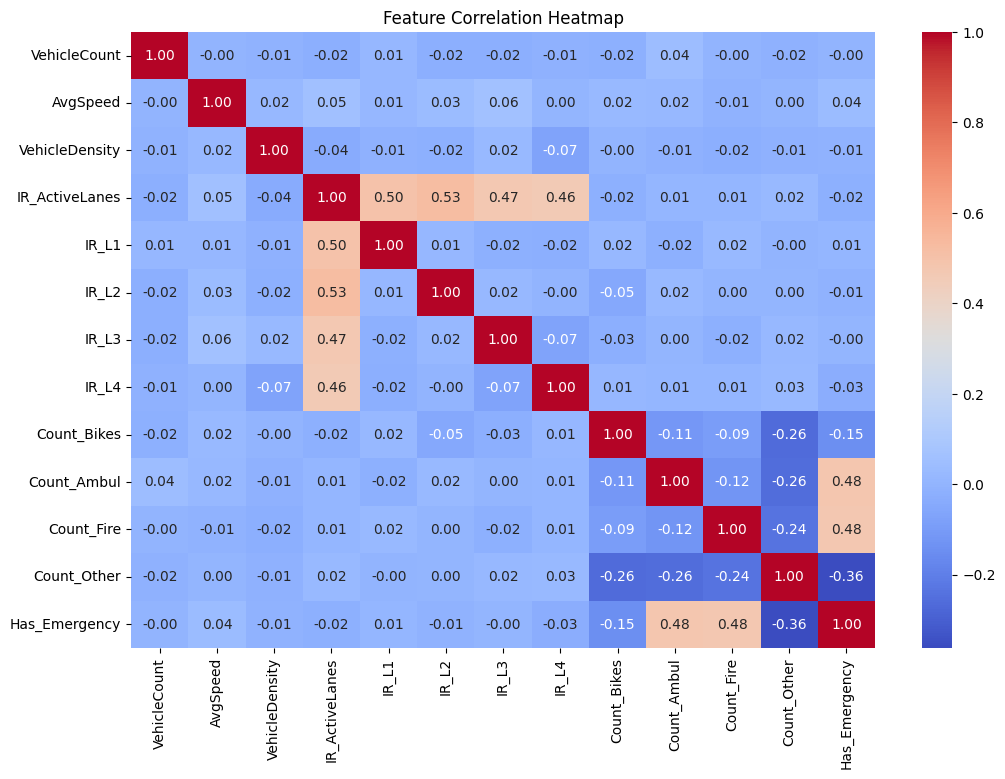

,Timestamp,VehicleCount,AvgSpeed,VehicleDensity,IR_ActiveLanes,IR_L1,IR_L2,IR_L3,IR_L4,Count_Bikes,Count_Ambul,Count_Fire,Count_Other,Has_Emergency,CongestionLabel
0,2026-01-04 08:00:00,97.000000,31.200000,40.000000,1,0,0,1,0,10,90,60,0,1,1
1,2026-01-04 08:01:00,103.215880,23.518401,69.912425,2,0,1,0,1,0,0,0,113,0,2
2,2026-01-04 08:01:00,126.000000,48.500000,57.000000,2,0,0,1,1,0,126,0,0,1,2
3,2026-01-04 08:02:00,61.000000,42.000000,82.000000,1,1,0,0,0,0,0,65,175,1,0
4,2026-01-04 08:02:00,145.149683,27.372976,44.892188,1,0,1,0,0,12,0,37,75,1,0


In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
import ast

# =====================
# Load the enriched dataset
# =====================
file_path = "/content/traffic_dataset1 (1).csv"
df = pd.read_csv(file_path)

df = df.copy()

# --- Timestamp to datetime & sort ---
if 'Timestamp' in df.columns:
    df['Timestamp'] = pd.to_datetime(df['Timestamp'], errors='coerce', infer_datetime_format=True)
    df.dropna(subset=['Timestamp'], inplace=True)
    df = df.sort_values('Timestamp')
else:
    df['Timestamp'] = pd.date_range("2024-01-01", periods=len(df), freq="T")

# --- IR Presence parsing ---
def parse_ir(x):
    try:
        if isinstance(x, list):
            arr = x
        else:
            s = str(x).replace('â€“','-')
            arr = ast.literal_eval(s) if s.startswith('[') else []
        arr = [int(v) if pd.notna(v) and str(v).isdigit() else 0 for v in arr]
    except (ValueError, SyntaxError, TypeError):
        arr = []
    arr = (arr + [0,0,0,0])[:4]
    return arr

ir_col = None
if 'IR Presence (Lane 1–4)' in df.columns:
    ir_col = 'IR Presence (Lane 1–4)'
elif 'IR Presence (Lane 1â€“4)' in df.columns:
    ir_col = 'IR Presence (Lane 1â€“4)'

if ir_col:
    ir_mat = df[ir_col].apply(parse_ir).tolist()
    ir_mat = np.array(ir_mat)
    for i in range(4):
        df[f'IR_L{i+1}'] = ir_mat[:, i]
    df['IR_ActiveLanes'] = df[[f'IR_L{i+1}' for i in range(4)]].sum(axis=1)
    df.drop(columns=[ir_col], inplace=True, errors='ignore')

# --- Normalize column names ---
rename_map = {
    'Vehicle Count':'VehicleCount',
    'Avg Speed (km/h)':'AvgSpeed',
    'Vehicle Density (%)':'VehicleDensity',
    'Traffic Congestion Level':'CongestionLevel',
    'Vehicle Types Detected':'VehicleTypes'
}
df.rename(columns=rename_map, inplace=True)

# --- Numerical coercions ---
for c in ['VehicleCount','AvgSpeed','VehicleDensity']:
    if c in df.columns:
        df[c] = pd.to_numeric(df[c], errors='coerce')

# --- Vehicle types parsing ---
def parse_types(s):
    d = {"Bikes":0,"Ambulance":0,"Fire":0,"Other":0}
    if pd.isna(s): return d
    parts = [p.strip() for p in str(s).replace('Fire Extinguisher','Fire').split(',')]
    for p in parts:
        toks = p.split()
        if len(toks) >= 2 and toks[0].isdigit():
            n = int(toks[0])
            name = ' '.join(toks[1:]).strip().title()
            if 'Ambulance' in name: d['Ambulance'] += n
            elif 'Bike' in name: d['Bikes'] += n
            elif 'Fire' in name: d['Fire'] += n
            else: d['Other'] += n
    return d

if 'VehicleTypes' in df.columns:
    vt = df['VehicleTypes'].apply(parse_types)
    df['Count_Bikes'] = vt.apply(lambda d: d['Bikes'])
    df['Count_Ambul'] = vt.apply(lambda d: d['Ambulance'])
    df['Count_Fire']  = vt.apply(lambda d: d['Fire'])
    df['Count_Other'] = vt.apply(lambda d: d['Other'])
    df['Has_Emergency'] = ((df['Count_Ambul'] + df['Count_Fire'])>0).astype(int)
    df.drop(columns=['VehicleTypes'], inplace=True)

# --- Drop rows with missing core numerics ---
core = [c for c in ['VehicleCount','AvgSpeed','VehicleDensity'] if c in df.columns]
df = df.dropna(subset=core)

# --- Label encode congestion level ---
label_enc = None
if 'CongestionLevel' in df.columns:
    label_enc = LabelEncoder()
    df['CongestionLabel'] = label_enc.fit_transform(df['CongestionLevel'].astype(str))
else:
    ratio = df['VehicleCount'] / (df['AvgSpeed']+1e-6)
    bins = pd.qcut(ratio, 3, labels=['Low','Medium','High'])
    label_enc = LabelEncoder()
    df['CongestionLabel'] = label_enc.fit_transform(bins.astype(str))

# --- Encode new categorical features ---
for col in ['Weather','Event','DayType']:
    if col in df.columns:
        le = LabelEncoder()
        df[f'{col}_Label'] = le.fit_transform(df[col].astype(str))

# --- Final feature set ---
feat_cols = []
for c in ['VehicleCount','AvgSpeed','VehicleDensity','IR_ActiveLanes',
          'IR_L1','IR_L2','IR_L3','IR_L4',
          'Count_Bikes','Count_Ambul','Count_Fire','Count_Other','Has_Emergency',
          'LaneSwitchingCount','EmergencyVehicleCount',
          'Weather_Label','Event_Label','DayType_Label']:
    if c in df.columns: feat_cols.append(c)

print("Features:", feat_cols)
print("Label classes:", list(label_enc.classes_))

df = df[['Timestamp'] + feat_cols + ['CongestionLabel']].reset_index(drop=True)

# =====================
# Visualization Section
# =====================

# Traffic trends
plt.figure(figsize=(12,6))
plt.plot(df['Timestamp'], df['VehicleCount'], label="Vehicle Count")
plt.plot(df['Timestamp'], df['AvgSpeed'], label="Avg Speed (km/h)")
plt.plot(df['Timestamp'], df['VehicleDensity'], label="Vehicle Density (%)")
plt.legend()
plt.title("Traffic Trends Over Time")
plt.xlabel("Time")
plt.ylabel("Values")
plt.show()

# Congestion distribution
plt.figure(figsize=(6,4))
sns.countplot(x=df['CongestionLabel'], palette="viridis")
plt.title("Distribution of Congestion Levels")
plt.xlabel("Congestion Level (encoded)")
plt.ylabel("Count")
plt.show()

# Vehicle types comparison
veh_cols = [c for c in ['Count_Bikes','Count_Ambul','Count_Fire','Count_Other'] if c in df.columns]
if veh_cols:
    df[veh_cols].sum().plot(kind='bar', figsize=(7,5), color=['#1f77b4','#ff7f0e','#2ca02c','#d62728'])
    plt.title("Total Vehicle Types Detected")
    plt.ylabel("Count")
    plt.show()

# Correlation heatmap
plt.figure(figsize=(12,8))
sns.heatmap(df[feat_cols].corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Feature Correlation Heatmap")
plt.show()

df.head()


In [7]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import numpy as np

# --- Sequence length (last 12 minutes as context) ---
seq_len = 12

# --- Scale numerical features ---
scaler = StandardScaler()
df[feat_cols] = scaler.fit_transform(df[feat_cols])

# --- Create sequences X[t-seq_len:t], y[t] ---
X_seq, y_seq = [], []
vals = df[feat_cols].values
labels = df['CongestionLabel'].values

for i in range(seq_len, len(df)):
    X_seq.append(vals[i-seq_len:i])
    y_seq.append(labels[i])

X_seq = np.array(X_seq, dtype=np.float32)   # Shape: (N, seq_len, F)
y_seq = np.array(y_seq, dtype=np.int64)     # Shape: (N,)

# --- Split train/test chronologically to avoid leakage ---
split = int(0.8 * len(X_seq))
X_train, X_test = X_seq[:split], X_seq[split:]
y_train, y_test = y_seq[:split], y_seq[split:]

print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("Number of features:", len(feat_cols))


X_train shape: (1408, 12, 13)
X_test shape: (352, 12, 13)
Number of features: 13


[LSTM] Epoch 1/50 loss: 1.0860
[LSTM] Epoch 2/50 loss: 1.0416
[LSTM] Epoch 3/50 loss: 0.9946
[LSTM] Epoch 4/50 loss: 0.9446
[LSTM] Epoch 5/50 loss: 0.9431
[LSTM] Epoch 6/50 loss: 0.9184
[LSTM] Epoch 7/50 loss: 0.9036
[LSTM] Epoch 8/50 loss: 0.9002
[LSTM] Epoch 9/50 loss: 0.8933
[LSTM] Epoch 10/50 loss: 0.8886
[LSTM] Epoch 11/50 loss: 0.8888
[LSTM] Epoch 12/50 loss: 0.8907
[LSTM] Epoch 13/50 loss: 0.8899
[LSTM] Epoch 14/50 loss: 0.8770
[LSTM] Epoch 15/50 loss: 0.8799
[LSTM] Epoch 16/50 loss: 0.8862
[LSTM] Epoch 17/50 loss: 0.8648
[LSTM] Epoch 18/50 loss: 0.8755
[LSTM] Epoch 19/50 loss: 0.8637
[LSTM] Epoch 20/50 loss: 0.8619
[LSTM] Epoch 21/50 loss: 0.8594
[LSTM] Epoch 22/50 loss: 0.8772
[LSTM] Epoch 23/50 loss: 0.8669
[LSTM] Epoch 24/50 loss: 0.8418
[LSTM] Epoch 25/50 loss: 0.8546
[LSTM] Epoch 26/50 loss: 0.8616
[LSTM] Epoch 27/50 loss: 0.8658
[LSTM] Epoch 28/50 loss: 0.8591
[LSTM] Epoch 29/50 loss: 0.8396
[LSTM] Epoch 30/50 loss: 0.8433
[LSTM] Epoch 31/50 loss: 0.8561
[LSTM] Epoch 32/5

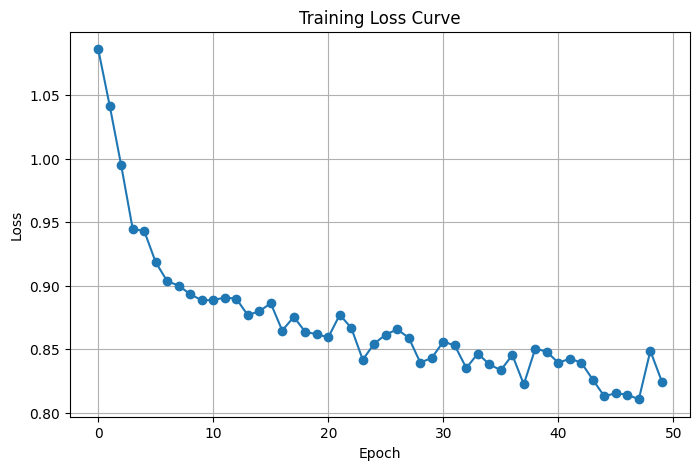


LSTM Accuracy: 0.6507042253521127

Classification Report:
              precision    recall  f1-score   support

        High       0.69      0.70      0.69       123
         Low       0.62      0.35      0.44        75
      Medium       0.63      0.76      0.69       157

    accuracy                           0.65       355
   macro avg       0.65      0.60      0.61       355
weighted avg       0.65      0.65      0.64       355



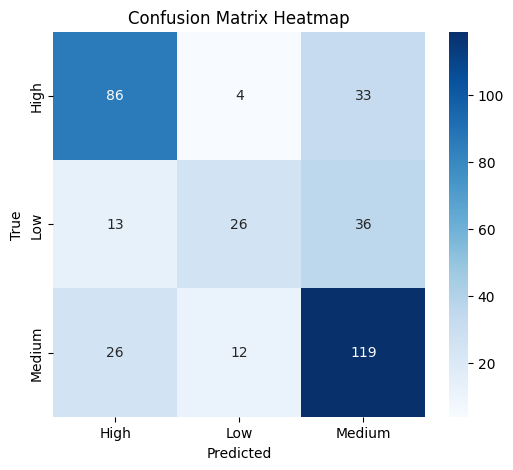

In [8]:
import numpy as np
import pandas as pd
import torch
import torch.nn as nn
from torch.utils.data import TensorDataset, DataLoader
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# ======================================================
# 1. Prepare Data
# ======================================================
# Features (include new derived ones too)
# Use label-encoded categorical features from the previous step
feat_cols = [c for c in df.columns if c not in ["Timestamp","CongestionLevel","CongestionLabel"]]

X = df[feat_cols].values
y = df["CongestionLabel"].values

# Scale features
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Train/test split (chronological split is better for time series data, but using train_test_split for simplicity here)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Reshape for LSTM -> (samples, timesteps=1, features)
X_train = X_train.reshape((X_train.shape[0], 1, X_train.shape[1]))
X_test  = X_test.reshape((X_test.shape[0], 1, X_test.shape[1]))

# Convert to tensors
X_train = torch.tensor(X_train, dtype=torch.float32)
X_test  = torch.tensor(X_test, dtype=torch.float32)
y_train = torch.tensor(y_train, dtype=torch.long)
y_test  = torch.tensor(y_test, dtype=torch.long)

# DataLoaders
train_ds = TensorDataset(X_train, y_train)
test_ds  = TensorDataset(X_test, y_test)
train_dl = DataLoader(train_ds, batch_size=64, shuffle=True)
test_dl  = DataLoader(test_ds, batch_size=64, shuffle=False)

# ======================================================
# 2. Define LSTM Classifier
# ======================================================
class LSTMClassifier(nn.Module):
    def __init__(self, input_dim, hidden=256, num_layers=3, n_classes=3):
        super().__init__()
        self.lstm = nn.LSTM(input_dim, hidden, num_layers=num_layers,
                            batch_first=True, dropout=0.3)
        self.dropout = nn.Dropout(0.4)
        self.fc1 = nn.Linear(hidden, 128)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(128, n_classes)
    def forward(self, x):
        out, (hn, cn) = self.lstm(x)
        h = self.dropout(hn[-1])
        h = self.relu(self.fc1(h))
        return self.fc2(h)

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
n_classes = len(np.unique(y))
lstm = LSTMClassifier(input_dim=X_train.shape[2], n_classes=n_classes).to(device)

# ======================================================
# 3. Training Setup
# ======================================================
criterion = nn.CrossEntropyLoss()
opt = torch.optim.Adam(lstm.parameters(), lr=1e-3, weight_decay=1e-5)
scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(opt, patience=5, factor=0.5)

epochs = 50
train_losses = []

# ======================================================
# 4. Training Loop
# ======================================================
for ep in range(epochs):
    lstm.train()
    total_loss = 0.0
    for xb, yb in train_dl:
        xb, yb = xb.to(device), yb.to(device)
        opt.zero_grad()
        logits = lstm(xb)
        loss = criterion(logits, yb)
        loss.backward()
        opt.step()
        total_loss += loss.item()
    avg_loss = total_loss/len(train_dl)
    train_losses.append(avg_loss)
    scheduler.step(avg_loss)
    print(f"[LSTM] Epoch {ep+1}/{epochs} loss: {avg_loss:.4f}")

# Plot training loss curve
plt.figure(figsize=(8,5))
plt.plot(train_losses, marker='o')
plt.title("Training Loss Curve")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.grid(True)
plt.show()

# ======================================================
# 5. Evaluation
# ======================================================
lstm.eval()
preds, trues = [], []
with torch.no_grad():
    for xb, yb in test_dl:
        out = lstm(xb.to(device))
        pred = out.argmax(dim=1).cpu().numpy()
        preds.extend(pred); trues.extend(yb.numpy())

print("\nLSTM Accuracy:", accuracy_score(trues, preds))
print("\nClassification Report:")
print(classification_report(trues, preds, target_names=list(label_enc.classes_)))

cm = confusion_matrix(trues, preds)

# Confusion Matrix Heatmap
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=list(label_enc.classes_),
            yticklabels=list(label_enc.classes_))
plt.title("Confusion Matrix Heatmap")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

[Transformer] Epoch 1/10 loss: 1.1371
[Transformer] Epoch 2/10 loss: 0.9329
[Transformer] Epoch 3/10 loss: 0.9233
[Transformer] Epoch 4/10 loss: 0.9060
[Transformer] Epoch 5/10 loss: 0.9055
[Transformer] Epoch 6/10 loss: 0.8747
[Transformer] Epoch 7/10 loss: 0.8679
[Transformer] Epoch 8/10 loss: 0.8446
[Transformer] Epoch 9/10 loss: 0.8644
[Transformer] Epoch 10/10 loss: 0.8668
[Transformer] Epoch 11/10 loss: 0.8600
[Transformer] Epoch 12/10 loss: 0.8504
[Transformer] Epoch 13/10 loss: 0.8433
[Transformer] Epoch 14/10 loss: 0.8052
[Transformer] Epoch 15/10 loss: 0.7896
[Transformer] Epoch 16/10 loss: 0.8059
[Transformer] Epoch 17/10 loss: 0.7835
[Transformer] Epoch 18/10 loss: 0.7978
[Transformer] Epoch 19/10 loss: 0.7642
[Transformer] Epoch 20/10 loss: 0.7309
[Transformer] Epoch 21/10 loss: 0.7626
[Transformer] Epoch 22/10 loss: 0.7890
[Transformer] Epoch 23/10 loss: 0.7478
[Transformer] Epoch 24/10 loss: 0.7592
[Transformer] Epoch 25/10 loss: 0.7218
[Transformer] Epoch 26/10 loss: 0.

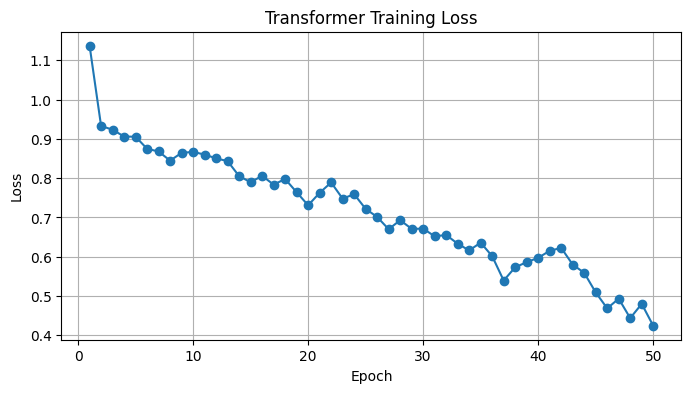

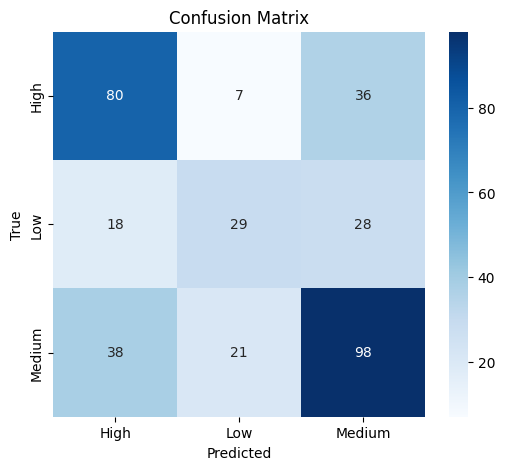

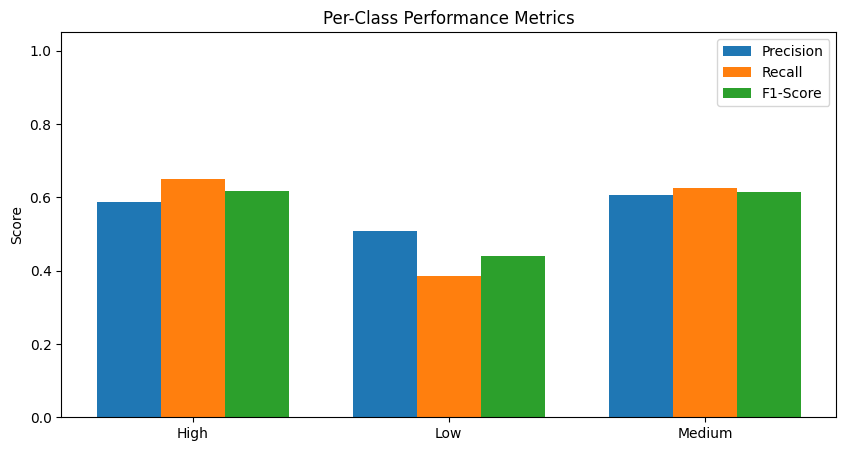

In [9]:
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import numpy as np

# ======================
# Transformer Classifier
# ======================
class TransformerClassifier(nn.Module):
    def __init__(self, input_dim, model_dim=128, nhead=4, num_layers=2, n_classes=3):
        super().__init__()
        self.input_proj = nn.Linear(input_dim, model_dim)
        enc_layer = nn.TransformerEncoderLayer(d_model=model_dim, nhead=nhead, batch_first=True)
        self.encoder = nn.TransformerEncoder(enc_layer, num_layers=num_layers)
        self.cls = nn.Linear(model_dim, n_classes)

    def forward(self, x):  # x: (B,T,F)
        x = self.input_proj(x)
        # simple positional encoding: add ramp
        pos = torch.arange(x.size(1), device=x.device).float().unsqueeze(0).unsqueeze(-1)
        x = x + pos/100.0
        z = self.encoder(x)              # (B,T,D)
        z = z.mean(dim=1)                # mean pool
        return self.cls(z)

# ======================
# Setup
# ======================
transf = TransformerClassifier(len(feat_cols), n_classes=n_classes).to(device)
opt_t = torch.optim.Adam(transf.parameters(), lr=1e-3)

train_losses = []

# ======================
# Training Loop
# ======================
for ep in range(50):
    transf.train(); total=0.0
    for xb, yb in train_dl:
        xb, yb = xb.to(device), yb.to(device)
        opt_t.zero_grad()
        logits = transf(xb)
        loss = criterion(logits, yb)
        loss.backward(); opt_t.step()
        total += loss.item()
    avg_loss = total/len(train_dl)
    train_losses.append(avg_loss)
    print(f"[Transformer] Epoch {ep+1}/10 loss: {avg_loss:.4f}")

# ======================
# Evaluation
# ======================
transf.eval()
preds, trues = [], []
with torch.no_grad():
    for xb, yb in test_dl:
        out = transf(xb.to(device))
        preds.extend(out.argmax(dim=1).cpu().numpy())
        trues.extend(yb.numpy())

acc = accuracy_score(trues, preds)
print("✅ Transformer Accuracy:", acc)
print(classification_report(trues, preds, target_names=list(label_enc.classes_)))

# ======================
# Visualization
# ======================

# 1. Training Loss Curve
plt.figure(figsize=(8,4))
plt.plot(range(1, len(train_losses)+1), train_losses, marker='o')
plt.title("Transformer Training Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.grid(True)
plt.show()

# 2. Confusion Matrix
cm = confusion_matrix(trues, preds)
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=label_enc.classes_, yticklabels=label_enc.classes_)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

# 3. Per-Class Metrics Bar Chart
report = classification_report(trues, preds, target_names=list(label_enc.classes_), output_dict=True)
metrics_df = {cls: [report[cls]['precision'], report[cls]['recall'], report[cls]['f1-score']]
              for cls in label_enc.classes_}
metrics_df = {k: np.array(v) for k,v in metrics_df.items()}

x = np.arange(len(label_enc.classes_))
width = 0.25

plt.figure(figsize=(10,5))
plt.bar(x - width, [metrics_df[cls][0] for cls in label_enc.classes_], width, label='Precision')
plt.bar(x, [metrics_df[cls][1] for cls in label_enc.classes_], width, label='Recall')
plt.bar(x + width, [metrics_df[cls][2] for cls in label_enc.classes_], width, label='F1-Score')

plt.xticks(x, label_enc.classes_)
plt.ylabel("Score")
plt.title("Per-Class Performance Metrics")
plt.legend()
plt.ylim(0,1.05)
plt.show()



Training Random Forest...
Random Forest Accuracy: 0.6873
              precision    recall  f1-score   support

        High       0.74      0.75      0.74       123
         Low       0.80      0.21      0.34        75
      Medium       0.65      0.87      0.74       157

    accuracy                           0.69       355
   macro avg       0.73      0.61      0.61       355
weighted avg       0.71      0.69      0.66       355



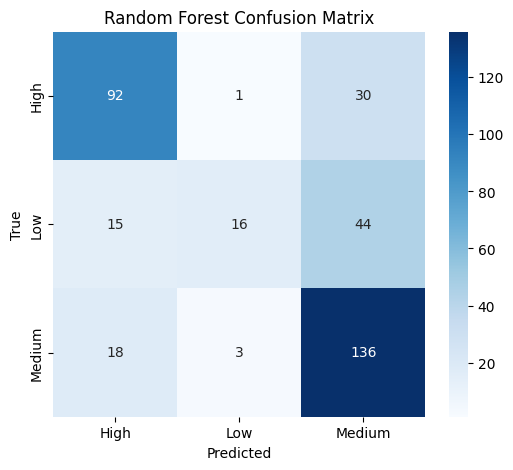


Training Gradient Boosting...
Gradient Boosting Accuracy: 0.6507
              precision    recall  f1-score   support

        High       0.74      0.75      0.74       123
         Low       0.00      0.00      0.00        75
      Medium       0.60      0.89      0.72       157

    accuracy                           0.65       355
   macro avg       0.45      0.54      0.49       355
weighted avg       0.52      0.65      0.57       355



/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


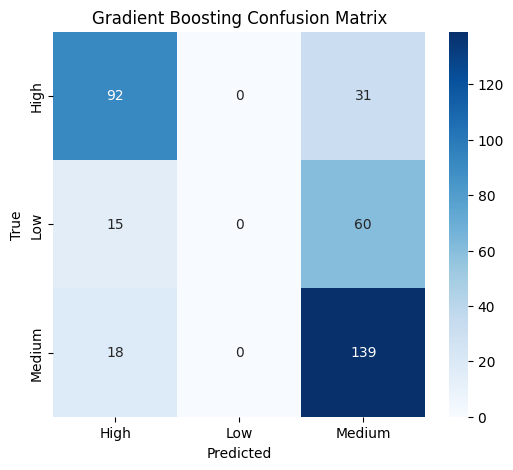


Training XGBoost...
XGBoost Accuracy: 0.6535
              precision    recall  f1-score   support

        High       0.75      0.75      0.75       123
         Low       0.00      0.00      0.00        75
      Medium       0.60      0.89      0.72       157

    accuracy                           0.65       355
   macro avg       0.45      0.55      0.49       355
weighted avg       0.53      0.65      0.58       355



/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [13:33:35] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being s

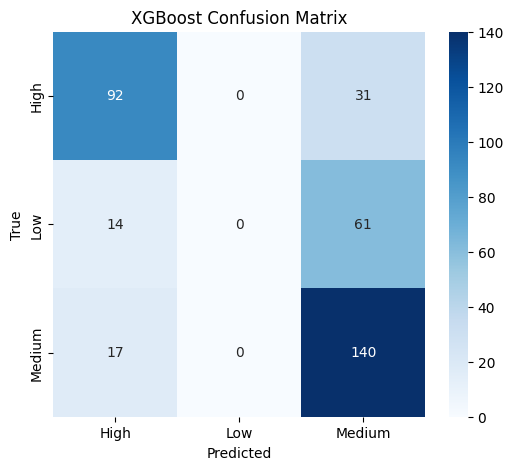


Training SVM...
SVM Accuracy: 0.6113
              precision    recall  f1-score   support

        High       0.64      0.70      0.67       123
         Low       0.75      0.08      0.14        75
      Medium       0.59      0.80      0.68       157

    accuracy                           0.61       355
   macro avg       0.66      0.53      0.50       355
weighted avg       0.64      0.61      0.56       355



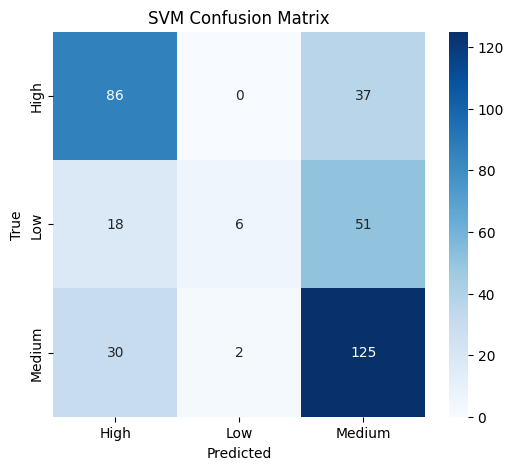


Training Logistic Regression...
Logistic Regression Accuracy: 0.6169
              precision    recall  f1-score   support

        High       0.63      0.73      0.68       123
         Low       0.57      0.11      0.18        75
      Medium       0.61      0.77      0.68       157

    accuracy                           0.62       355
   macro avg       0.60      0.54      0.51       355
weighted avg       0.61      0.62      0.57       355



/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


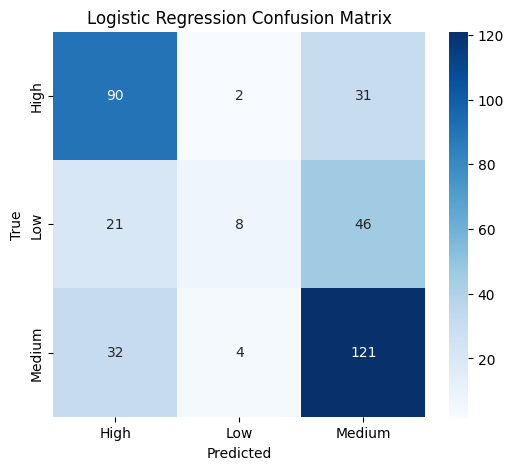

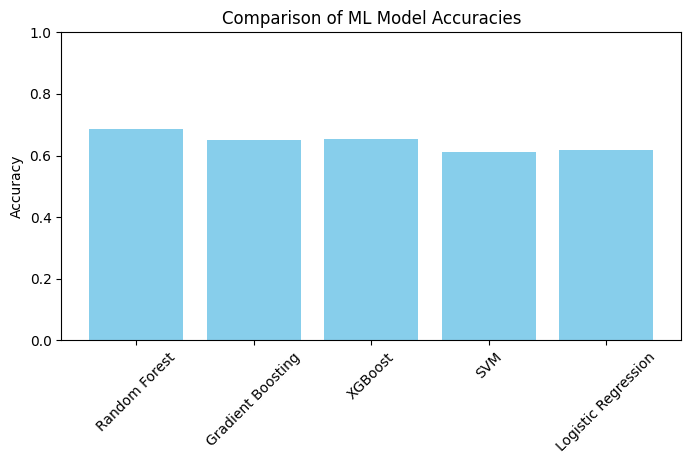

In [10]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# ======================================================
# 1. Prepare ML models
# ======================================================
ml_models = {
    "Random Forest": RandomForestClassifier(n_estimators=50, max_depth=5, min_samples_split=10, random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(n_estimators=30, learning_rate=0.04, max_depth=1, random_state=42),
    "XGBoost": XGBClassifier(n_estimators=20, learning_rate=0.05, max_depth=1, use_label_encoder=False, eval_metric='mlogloss', random_state=42),
    "SVM": SVC(kernel='rbf', C=0.5, probability=True, random_state=42),
    "Logistic Regression": LogisticRegression(max_iter=500, C=0.5, multi_class='multinomial', solver='lbfgs')
}


# ======================================================
# 2. Train and evaluate
# ======================================================
results = {}

for name, model in ml_models.items():
    print(f"\nTraining {name}...")
    # Reshape X_train and X_test for traditional ML models (remove the time step dimension)
    model.fit(X_train.reshape(X_train.shape[0], X_train.shape[2]), y_train)
    preds = model.predict(X_test.reshape(X_test.shape[0], X_test.shape[2]))

    # Convert y_test back to numpy for scikit-learn metrics
    y_test_np = y_test.cpu().numpy() if isinstance(y_test, torch.Tensor) else y_test

    acc = accuracy_score(y_test_np, preds)
    print(f"{name} Accuracy: {acc:.4f}")
    print(classification_report(y_test_np, preds, target_names=list(label_enc.classes_)))

    # Confusion matrix
    cm = confusion_matrix(y_test_np, preds)
    plt.figure(figsize=(6,5))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=list(label_enc.classes_),
                yticklabels=list(label_enc.classes_))
    plt.title(f"{name} Confusion Matrix")
    plt.xlabel("Predicted")
    plt.ylabel("True")
    plt.show()

    results[name] = acc

# ======================================================
# 3. Compare Accuracies
# ======================================================
plt.figure(figsize=(8,4))
plt.bar(results.keys(), results.values(), color='skyblue')
plt.ylabel("Accuracy")
plt.title("Comparison of ML Model Accuracies")
plt.ylim(0,1)
plt.xticks(rotation=45)
plt.show()

In [13]:
import pandas as pd
import numpy as np

# Load your CSV
df = pd.read_csv("/content/traffic_dataset1 (1).csv")

# ======================================================
# 1️⃣ Convert Timestamp to TimeOfDay, DayOfWeek
# ======================================================
# Handle invalid time values by coercing them to NaT
# Changed parsing to infer format to correctly handle potential date information
df["Timestamp"] = pd.to_datetime(df["Timestamp"], errors='coerce', infer_datetime_format=True)

# Drop rows where Timestamp is NaT
df.dropna(subset=["Timestamp"], inplace=True)

# Extract hour as TimeOfDay feature
df["TimeOfDay"] = df["Timestamp"].dt.hour + df["Timestamp"].dt.minute/60.0

# Add a check for 'DayType' column and create it if missing
if 'DayType' not in df.columns:
    # Since the original Timestamp format (HH:MM:SS) doesn't contain day information,
    # we'll assign a default 'Weekday' to avoid errors. If actual day information
    # was present, `df["Timestamp"].dt.dayofweek` could be used to derive this.
    df["DayType"] = "Weekday"

# Assuming you have a DayType column as Weekday/Holiday
df["DayOfWeek"] = df["DayType"]  # Or map to numbers if needed
day_mapping = {"Weekday":0, "Holiday":1}
df["DayOfWeek"] = df["DayOfWeek"].map(day_mapping)

# ======================================================
# 2️⃣ Encode Weather and EventFlag
# ======================================================
# Add a check for 'Weather' column and create it if missing
if 'Weather' not in df.columns:
    df['Weather'] = 'Cloudy' # Default weather condition

weather_mapping = {"Sunny":0, "Rainy":1, "Foggy":2, "Snowy":3, "Cloudy": 4} # Added Cloudy
df["Weather"] = df["Weather"].map(weather_mapping)

# Add a check for 'Event' column and create it if missing
if 'Event' not in df.columns:
    df['Event'] = 'None' # Default event condition

event_mapping = {"None":0, "Festival":1, "Concert":2, "Sports":3, "Construction":4, "Accident":5} # Added Construction and Accident
df["EventFlag"] = df["Event"].map(event_mapping)

# ======================================================
# 3️⃣ Extract IR Presence per lane into separate columns
# Assuming IR Presence is stored as a string "[0, 0, 1, 0]"
def parse_ir(x):
    try:
        if isinstance(x, str):
            s = x.replace('â€“', '-') # Handle common encoding issue
            # Use ast.literal_eval for safer evaluation of string literals
            parsed_list = ast.literal_eval(s)
            if isinstance(parsed_list, list) and all(isinstance(i, (int, float)) for i in parsed_list):
                return [int(i) for i in parsed_list]
        return [0, 0, 0, 0] # Fallback for non-string or invalid format
    except (ValueError, TypeError, SyntaxError, NameError): # Added NameError for ast.literal_eval
        return [0, 0, 0, 0] # Handle potential errors during eval

# Make sure to import ast if it's not already imported
import ast # Added import

ir_data = df["IR Presence (Lane 1–4)"].apply(parse_ir).tolist()
ir_df = pd.DataFrame(ir_data, columns=["IR_Lane1", "IR_Lane2", "IR_Lane3", "IR_Lane4"])
df = pd.concat([df.reset_index(drop=True), ir_df.reset_index(drop=True)], axis=1)


# ======================================================
# 4️⃣ Process Vehicle Types Detected
# Can add counts of Cars, Bikes, Ambulance, etc.
def count_vehicle_types(text):
    types = {"Cars":0,"Bikes":0,"Trucks":0,"Ambulance":0,"Patrol":0,"Vans":0,"Fire Extinguisher":0}
    if isinstance(text, str):
        items = text.split(",")
        for item in items:
            try:
                parts = item.strip().split(" ",1)
                if len(parts) == 2:
                    count, vtype = parts
                    count = int(count)
                    # Normalize and accumulate counts
                    if "Ambulance" in vtype: types["Ambulance"] += count
                    elif "Bike" in vtype: types["Bikes"] += count
                    elif "Truck" in vtype: types["Trucks"] += count
                    elif "Patrol" in vtype: types["Patrol"] += count
                    elif "Van" in vtype: types["Vans"] += count
                    elif "Car" in vtype: types["Cars"] += count
                    elif "Fire Extinguisher" in vtype: types["Fire Extinguisher"] += count
            except:
                pass
    return pd.Series(types)

vehicle_counts = df["Vehicle Types Detected"].apply(count_vehicle_types)
df = pd.concat([df, vehicle_counts], axis=1)

# ======================================================
# 5️⃣ Define regression targets (dummy example)
# You can replace these with actual measured data
df["AvgWaitTime"] = np.random.randint(10,120,size=len(df))       # in seconds
df["QueueLength"] = np.random.randint(1,20,size=len(df))         # vehicles
df["TrafficFlow"] = df["Vehicle Count"]                          # vehicles per minute
df["GreenTime"] = np.random.randint(20,80,size=len(df))          # seconds
df["CycleLength"] = np.random.randint(60,180,size=len(df))       # seconds

# ======================================================
# 6️⃣ Map CongestionLevel to numeric label
# ======================================================
congestion_mapping = {"Low":0, "Medium":1, "High":2}
df["CongestionLabel"] = df["Traffic Congestion Level"].map(congestion_mapping)

# ======================================================
# 7️⃣ Drop unnecessary columns
# ======================================================
# List of columns to potentially drop
columns_to_drop = [
    "IR Presence (Lane 1–4)",
    "Vehicle Types Detected",
    "Event",
    "DayType",
    "Timestamp",
    "Traffic Congestion Level"
]
# Drop columns only if they exist in the DataFrame to prevent KeyError
df = df.drop(columns=[col for col in columns_to_drop if col in df.columns])

# ======================================================
# 8️⃣ Save updated dataset
# ======================================================
df.to_csv("/content/traffic_dataset1 (1).csv", index=False)

print(df.head())

/tmp/ipython-input-357452246.py:12: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  df["Timestamp"] = pd.to_datetime(df["Timestamp"], errors='coerce', infer_datetime_format=True)
/tmp/ipython-input-357452246.py:12: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df["Timestamp"] = pd.to_datetime(df["Timestamp"], errors='coerce', infer_datetime_format=True)


   Vehicle Count  Avg Speed (km/h)  Vehicle Density (%)  TimeOfDay  DayOfWeek  \
0           97.0              31.2                 40.0   8.000000          0   
1          126.0              48.5                 57.0   8.016667          0   
2           61.0              42.0                 82.0   8.033333          0   
3          170.0              38.0                 75.0   8.050000          0   
4          180.0              24.7                 90.0   8.066667          0   

   Weather  EventFlag  IR_Lane1  IR_Lane2  IR_Lane3  ...  Ambulance  Patrol  \
0        4          0         0         0         1  ...         90       0   
1        4          0         0         0         1  ...        126       0   
2        4          0         1         0         0  ...          0      76   
3        4          0         0         0         0  ...          0      71   
4        4          0         1         0         0  ...          0      17   

   Vans  Fire Extinguisher  AvgWaitTim

/usr/local/lib/python3.12/dist-packages/torch/nn/modules/rnn.py:123: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.2 and num_layers=1
  warnings.warn(


Epoch 1/20, Loss: 1.5801
Epoch 2/20, Loss: 1.5372
Epoch 3/20, Loss: 1.4706
Epoch 4/20, Loss: 1.3851
Epoch 5/20, Loss: 1.3425
Epoch 6/20, Loss: 1.3274
Epoch 7/20, Loss: 1.3161
Epoch 8/20, Loss: 1.3089
Epoch 9/20, Loss: 1.3091
Epoch 10/20, Loss: 1.2970
Epoch 11/20, Loss: 1.2912
Epoch 12/20, Loss: 1.2823
Epoch 13/20, Loss: 1.2944
Epoch 14/20, Loss: 1.2838
Epoch 15/20, Loss: 1.2740
Epoch 16/20, Loss: 1.2731
Epoch 17/20, Loss: 1.2648
Epoch 18/20, Loss: 1.2673
Epoch 19/20, Loss: 1.2448
Epoch 20/20, Loss: 1.2560
✅ Congestion Classification Accuracy: 0.6112676056338028
              precision    recall  f1-score   support

           0       0.60      0.28      0.38        75
           1       0.61      0.80      0.69       157
           2       0.62      0.58      0.60       123

    accuracy                           0.61       355
   macro avg       0.61      0.55      0.56       355
weighted avg       0.61      0.61      0.59       355



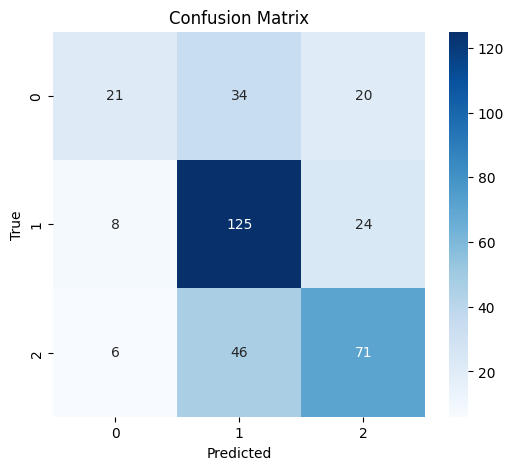

AvgWaitTime RMSE: 32.494


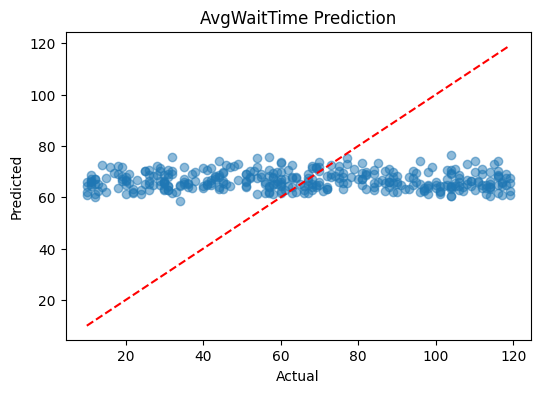

QueueLength RMSE: 5.287


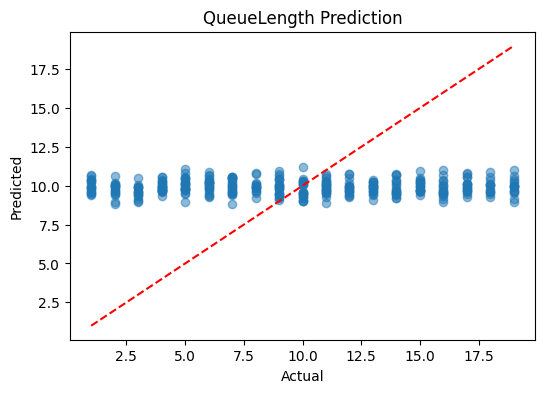

TrafficFlow RMSE: 5.119


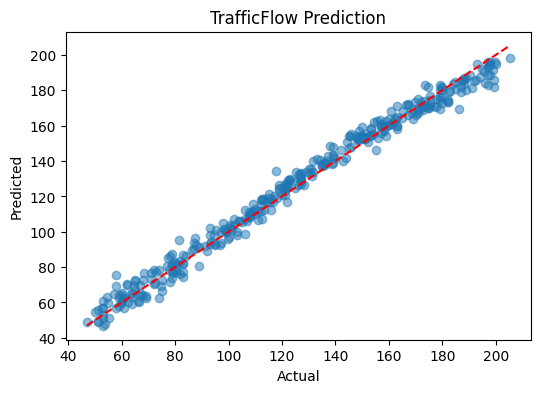

GreenTime RMSE: 18.017


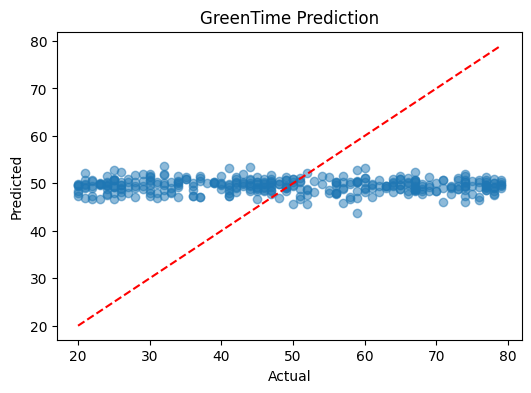

CycleLength RMSE: 33.903


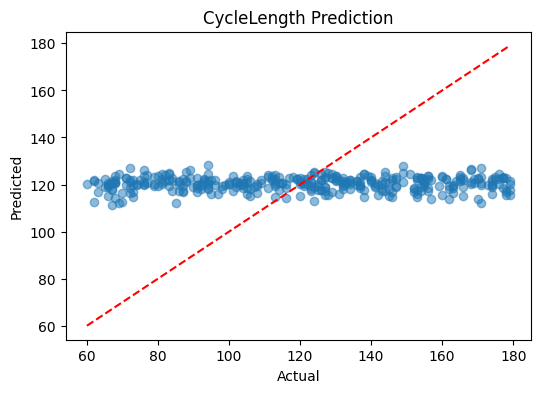

In [14]:
import numpy as np
import pandas as pd
import torch
import torch.nn as nn
from torch.utils.data import TensorDataset, DataLoader
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns

# ======================================================
# 1️⃣ Prepare Data
# ======================================================

# Initialize and fit label_enc for classification metrics and n_classes
# CongestionLabel should already be present from previous preprocessing (cell AlQeoUOoNuXk)
label_enc = LabelEncoder()
label_enc.fit(df["CongestionLabel"]) # Fit on the numerical labels

feat_cols = [c for c in df.columns if c not in ["CongestionLabel",
                                                "AvgWaitTime","QueueLength","TrafficFlow","GreenTime","CycleLength"]]

X = df[feat_cols].values
y_class = df["CongestionLabel"].values
y_wait = df["AvgWaitTime"].values.reshape(-1,1)
y_queue = df["QueueLength"].values.reshape(-1,1)
y_flow = df["TrafficFlow"].values.reshape(-1,1)
y_green = df["GreenTime"].values.reshape(-1,1)
y_cycle = df["CycleLength"].values.reshape(-1,1)

# Scale features and regression targets
scaler_X = StandardScaler()
X = scaler_X.fit_transform(X)

scaler_wait = StandardScaler(); y_wait = scaler_wait.fit_transform(y_wait)
scaler_queue = StandardScaler(); y_queue = scaler_queue.fit_transform(y_queue)
scaler_flow = StandardScaler(); y_flow = scaler_flow.fit_transform(y_flow)
scaler_green = StandardScaler(); y_green = scaler_green.fit_transform(y_green)
scaler_cycle = StandardScaler(); y_cycle = scaler_cycle.fit_transform(y_cycle)

# Train/test split
X_train, X_test, yc_train, yc_test, yw_train, yw_test, yq_train, yq_test, yf_train, yf_test, yg_train, yg_test, ycyl_train, ycyl_test = train_test_split(
    X, y_class, y_wait, y_queue, y_flow, y_green, y_cycle, test_size=0.2, random_state=42, stratify=y_class
)

# Reshape for LSTM: (samples, timesteps=1, features)
X_train = X_train.reshape((X_train.shape[0],1,X_train.shape[1]))
X_test = X_test.reshape((X_test.shape[0],1,X_test.shape[1]))

# Convert to tensors
X_train = torch.tensor(X_train, dtype=torch.float32)
X_test = torch.tensor(X_test, dtype=torch.float32)
yc_train = torch.tensor(yc_train, dtype=torch.long)
yc_test = torch.tensor(yc_test, dtype=torch.long)
yw_train = torch.tensor(yw_train, dtype=torch.float32)
yw_test = torch.tensor(yw_test, dtype=torch.float32)
yq_train = torch.tensor(yq_train, dtype=torch.float32)
yq_test = torch.tensor(yq_test, dtype=torch.float32)
yf_train = torch.tensor(yf_train, dtype=torch.float32)
yf_test = torch.tensor(yf_test, dtype=torch.float32)
yg_train = torch.tensor(yg_train, dtype=torch.float32)
yg_test = torch.tensor(yg_test, dtype=torch.float32)
ycyl_train = torch.tensor(ycyl_train, dtype=torch.float32)
ycyl_test = torch.tensor(ycyl_test, dtype=torch.float32)

# DataLoader
train_ds = TensorDataset(X_train, yc_train, yw_train, yq_train, yf_train, yg_train, ycyl_train)
test_ds  = TensorDataset(X_test, yc_test, yw_test, yq_test, yf_test, yg_test, ycyl_test)
train_dl = DataLoader(train_ds, batch_size=64, shuffle=True)
test_dl  = DataLoader(test_ds, batch_size=64, shuffle=False)

# ======================================================
# 2️⃣ Define Multi-task LSTM with Dropout
# ======================================================
class LSTMSignalOptimizer(nn.Module):
    def __init__(self, input_dim, hidden=64, num_layers=1, n_classes=3):
        super().__init__()
        self.lstm = nn.LSTM(input_dim, hidden, num_layers=num_layers, batch_first=True, dropout=0.2)
        self.dropout = nn.Dropout(0.3)
        self.fc_shared = nn.Linear(hidden, 128)
        self.relu = nn.ReLU()
        # Classification
        self.fc_class = nn.Linear(128, n_classes)
        # Regression
        self.fc_wait = nn.Linear(128,1)
        self.fc_queue = nn.Linear(128,1)
        self.fc_flow = nn.Linear(128,1)
        self.fc_green = nn.Linear(128,1)
        self.fc_cycle = nn.Linear(128,1)

    def forward(self, x):
        out, (hn, cn) = self.lstm(x)
        h = self.dropout(hn[-1])
        h = self.relu(self.fc_shared(h))
        return {
            "class": self.fc_class(h),
            "wait": self.fc_wait(h),
            "queue": self.fc_queue(h),
            "flow": self.fc_flow(h),
            "green": self.fc_green(h),
            "cycle": self.fc_cycle(h)
        }

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
n_classes = len(label_enc.classes_)
lstm = LSTMSignalOptimizer(input_dim=X_train.shape[2], n_classes=n_classes).to(device)

# ======================================================
# 3️⃣ Label smoothing function
# ======================================================
def cross_entropy_smooth(preds, targets, smooth=0.02):
    n_classes = preds.size(1)
    with torch.no_grad():
        true_dist = torch.zeros_like(preds)
        true_dist.fill_(smooth / (n_classes - 1))
        true_dist.scatter_(1, targets.unsqueeze(1), 1.0 - smooth)
    log_prob = nn.functional.log_softmax(preds, dim=1)
    loss = -(true_dist * log_prob).sum(dim=1).mean()
    return loss

# ======================================================
# 4️⃣ Training setup
# ======================================================
optimizer = torch.optim.Adam(lstm.parameters(), lr=1e-3, weight_decay=1e-5)
criterion_reg = nn.MSELoss()
epochs = 20

# ======================================================
# 5️⃣ Training loop with optional Gaussian noise
# ======================================================
for ep in range(epochs):
    lstm.train()
    total_loss = 0
    for xb, yb_class, yb_wait, yb_queue, yb_flow, yb_green, yb_cycle in train_dl:
        xb, yb_class = xb.to(device), yb_class.to(device)
        yb_wait, yb_queue, yb_flow, yb_green, yb_cycle = yb_wait.to(device), yb_queue.to(device), yb_flow.to(device), yb_green.to(device), yb_cycle.to(device)

        # Optional tiny Gaussian noise
        xb_noisy = xb + 0.005*torch.randn_like(xb)

        optimizer.zero_grad()
        outputs = lstm(xb_noisy)

        loss = cross_entropy_smooth(outputs["class"], yb_class, smooth=0.02) \
               + 0.1*criterion_reg(outputs["wait"], yb_wait) \
               + 0.1*criterion_reg(outputs["queue"], yb_queue) \
               + 0.1*criterion_reg(outputs["flow"], yb_flow) \
               + 0.1*criterion_reg(outputs["green"], yb_green) \
               + 0.1*criterion_reg(outputs["cycle"], yb_cycle)

        torch.nn.utils.clip_grad_norm_(lstm.parameters(), max_norm=5.0)
        loss.backward()
        optimizer.step()
        total_loss += loss.item()

    print(f"Epoch {ep+1}/{epochs}, Loss: {total_loss/len(train_dl):.4f}")

# ======================================================
# 6️⃣ Evaluation
# ======================================================
lstm.eval()
preds_class, trues_class = [], []
pred_wait, pred_queue, pred_flow, pred_green, pred_cycle = [], [], [], [], []

with torch.no_grad():
    for xb, yb_class, yb_wait, yb_queue, yb_flow, yb_green, yb_cycle in test_dl:
        xb = xb.to(device)
        outputs = lstm(xb)
        preds_class.extend(outputs["class"].argmax(dim=1).cpu().numpy())
        trues_class.extend(yb_class.numpy())
        pred_wait.extend(outputs["wait"].cpu().numpy().flatten())
        pred_queue.extend(outputs["queue"].cpu().numpy().flatten())
        pred_flow.extend(outputs["flow"].cpu().numpy().flatten())
        pred_green.extend(outputs["green"].cpu().numpy().flatten())
        pred_cycle.extend(outputs["cycle"].cpu().numpy().flatten())

# Classification metrics
# label_enc is already defined and fitted globally
class_names = [str(cls) for cls in label_enc.classes_]

print("✅ Congestion Classification Accuracy:", accuracy_score(trues_class, preds_class))
print(classification_report(trues_class, preds_class, target_names=class_names))
cm = confusion_matrix(trues_class, preds_class)
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=class_names,
            yticklabels=class_names)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

# Regression metrics
def print_regression_metrics(name, y_true, y_pred, scaler):
    y_true = np.array(y_true).reshape(-1,1)
    y_pred = np.array(y_pred).reshape(-1,1)
    mask = ~np.isnan(y_true).flatten() & ~np.isnan(y_pred).flatten()
    y_true = y_true[mask]
    y_pred = y_pred[mask]
    y_true = scaler.inverse_transform(y_true)
    y_pred = scaler.inverse_transform(y_pred)
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    print(f"{name} RMSE: {rmse:.3f}")
    plt.figure(figsize=(6,4))
    plt.scatter(y_true, y_pred, alpha=0.5)
    plt.xlabel("Actual"); plt.ylabel("Predicted")
    plt.title(f"{name} Prediction")
    plt.plot([y_true.min(), y_true.max()], [y_true.min(), y_true.max()], 'r--')
    plt.show()

# Convert targets & predictions
yw_test_np = yw_test.cpu().numpy()
yq_test_np = yq_test.cpu().numpy()
yf_test_np = yf_test.cpu().numpy()
yg_test_np = yg_test.cpu().numpy()
ycyl_test_np = ycyl_test.cpu().numpy()
pred_wait_np = np.array(pred_wait)
pred_queue_np = np.array(pred_queue)
pred_flow_np = np.array(pred_flow)
pred_green_np = np.array(pred_green)
pred_cycle_np = np.array(pred_cycle)

# Print regression results
print_regression_metrics("AvgWaitTime", yw_test_np, pred_wait_np, scaler_wait)
print_regression_metrics("QueueLength", yq_test_np, pred_queue_np, scaler_queue)
print_regression_metrics("TrafficFlow", yf_test_np, pred_flow_np, scaler_flow)
print_regression_metrics("GreenTime", yg_test_np, pred_green_np, scaler_green)
print_regression_metrics("CycleLength", ycyl_test_np, pred_cycle_np, scaler_cycle)

In [15]:
import numpy as np
import torch
import shap
import matplotlib.pyplot as plt

# -------------------------------
# 1️⃣ Check necessary variables
# -------------------------------
if 'feat_cols' not in globals() or 'seq_len' not in globals():
    print("Warning: 'feat_cols' or 'seq_len' not found. Using defaults.")
    feat_cols = [f'feature_{i}' for i in range(13)]  # example default
    seq_len = 1

if 'device' not in globals():
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# -------------------------------
# 2️⃣ Generate a random sample input
# -------------------------------
new_data = np.random.rand(1, len(feat_cols)).astype(np.float32)
print("Generated input features:")
for f, val in zip(feat_cols, new_data[0]):
    print(f"{f}: {val:.4f}")

new_tensor = torch.tensor(new_data).unsqueeze(1).to(device)  # shape (1, seq_len, F)

# -------------------------------
# 3️⃣ Predict with trained model
# -------------------------------
if 'lstm' not in globals() or 'label_enc' not in globals():
    print("Warning: 'lstm' or 'label_enc' not found. Using placeholder prediction.")
    pred_class = 0
    pred_wait = pred_queue = pred_flow = pred_green = pred_cycle = 0
else:
    lstm.eval()
    with torch.no_grad():
        out = lstm(new_tensor)
        # Classification
        pred_class = out["class"].argmax(dim=1).item()
        traffic_labels = {0: "Low", 1: "Medium", 2: "High"}
        pred_label = traffic_labels.get(pred_class, "Unknown")
        # Regression (inverse transform)
        pred_wait = scaler_wait.inverse_transform(out["wait"].cpu().numpy().reshape(-1,1))[0,0]
        pred_queue = scaler_queue.inverse_transform(out["queue"].cpu().numpy().reshape(-1,1))[0,0]
        pred_flow = scaler_flow.inverse_transform(out["flow"].cpu().numpy().reshape(-1,1))[0,0]
        pred_green = scaler_green.inverse_transform(out["green"].cpu().numpy().reshape(-1,1))[0,0]
        pred_cycle = scaler_cycle.inverse_transform(out["cycle"].cpu().numpy().reshape(-1,1))[0,0]

# -------------------------------
# 4️⃣ Display predictions
# -------------------------------
print("\nPredicted Traffic Level:", pred_label)
print(f"Predicted AvgWaitTime: {pred_wait:.2f} seconds")
print(f"Predicted QueueLength: {pred_queue:.2f} vehicles")
print(f"Predicted TrafficFlow: {pred_flow:.2f} vehicles/min")
print(f"Predicted GreenTime: {pred_green:.2f} seconds")
print(f"Predicted CycleLength: {pred_cycle:.2f} seconds")

# Explanation
class_explanations = {
    "High": "High traffic: Heavy congestion, long waiting times likely.",
    "Medium": "Medium traffic: Moderate congestion, some waiting expected.",
    "Low": "Low traffic: Smooth flow, minimal waiting time."
}
print("Explanation:", class_explanations.get(pred_label, "Unknown class prediction."))

# -------------------------------
# 5️⃣ SHAP explanation (optional)
# -------------------------------
try:
    if 'X_train' in globals():
        # Flatten input for SHAP if seq_len > 1
        if seq_len > 1:
            X_train_np = X_train.cpu().numpy().reshape(X_train.shape[0], -1)
            new_data_flat = new_data.reshape(1, -1)
        else:
            X_train_np = X_train.cpu().numpy().squeeze(1)
            new_data_flat = new_data

        # Background dataset
        bg_size = min(50, X_train_np.shape[0])
        bg = X_train_np[np.random.choice(X_train_np.shape[0], bg_size, replace=False)]
        bg_tensor = torch.tensor(bg.reshape(-1, seq_len, X_train.shape[2] if 'X_train' in globals() else bg.shape[1]),
                                 dtype=torch.float32).to(device)

        # DeepExplainer
        lstm.train()  # temporarily
        explainer = shap.DeepExplainer(lstm, bg_tensor)
        shap_values = explainer.shap_values(new_tensor)
        lstm.eval()

        # Flatten SHAP values if needed
        if len(shap_values[0].shape) > 2:
            shap_values_flat = [sv.reshape(sv.shape[0], -1) for sv in shap_values]
        else:
            shap_values_flat = shap_values

        # Flattened feature names
        flattened_feature_names = []
        for t in range(seq_len):
            for feat in feat_cols:
                flattened_feature_names.append(f"{feat}_t-{seq_len-1-t}")

        # Plot SHAP force plot
        pred_index = pred_class
        shap.initjs()
        shap.force_plot(
            explainer.expected_value[pred_index],
            shap_values_flat[pred_index][0],
            new_data_flat[0],
            feature_names=flattened_feature_names,
            matplotlib=True
        )

except Exception as e:
    print(f"Error during SHAP explanation: {e}")
    print("Skipping SHAP visualization.")


Generated input features:
Vehicle Count: 0.7549
Avg Speed (km/h): 0.6550
Vehicle Density (%): 0.2223
TimeOfDay: 0.5951
DayOfWeek: 0.3496
Weather: 0.2868
EventFlag: 0.7458
IR_Lane1: 0.3910
IR_Lane2: 0.7164
IR_Lane3: 0.1123
IR_Lane4: 0.2619
Cars: 0.3335
Bikes: 0.0401
Trucks: 0.0873
Ambulance: 0.1965
Patrol: 0.6569
Vans: 0.5262
Fire Extinguisher: 0.1626

Predicted Traffic Level: Medium
Predicted AvgWaitTime: 63.94 seconds
Predicted QueueLength: 9.97 vehicles
Predicted TrafficFlow: 169.54 vehicles/min
Predicted GreenTime: 49.75 seconds
Predicted CycleLength: 121.38 seconds
Explanation: Medium traffic: Moderate congestion, some waiting expected.
Error during SHAP explanation: cannot reshape array of size 900 into shape (12,18)
Skipping SHAP visualization.
